In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
np.random.seed(42)

numeric_columns = ['budget', 'popularity', 'revenue', 'runtime']

In [39]:
# Load data
df = pd.read_csv('./data/cleaned-train.csv', sep=',')
df.set_index('id', inplace=True)
col_names = df.columns
for col in col_names:
    if 'genre_' in col:
        df[col] = df[col].astype('category')
df['original_language'] = df['original_language'].astype('category')
df['collection_bool'] = df['collection_bool'].astype('category')
df['collection_cat'] = df['collection_cat'].astype('category')

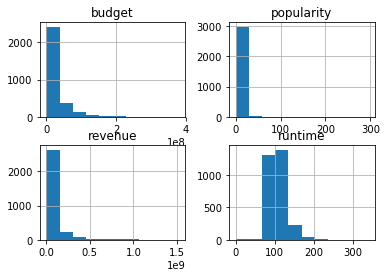

In [40]:
plot = df.hist()

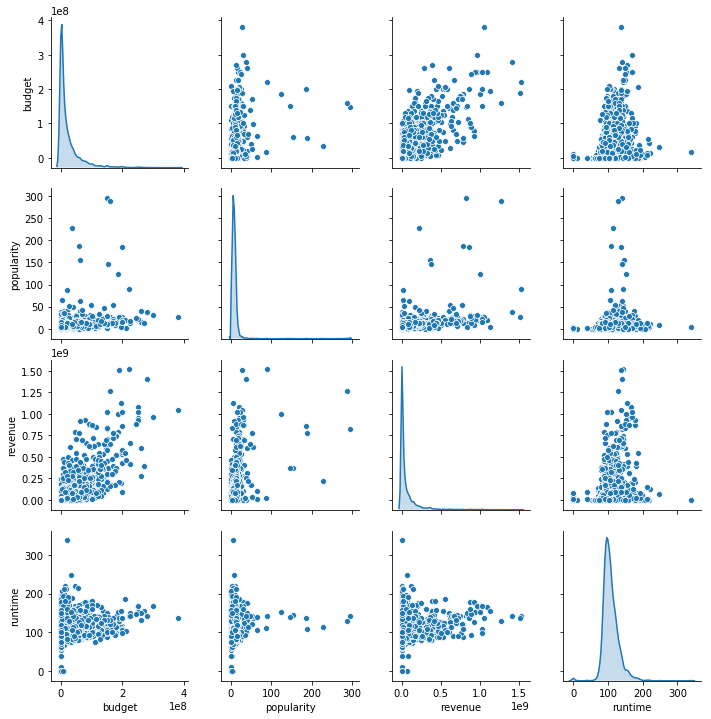

In [22]:
plot = sns.pairplot(df[['budget', 'popularity', 'revenue', 'runtime']], diag_kind='kde')

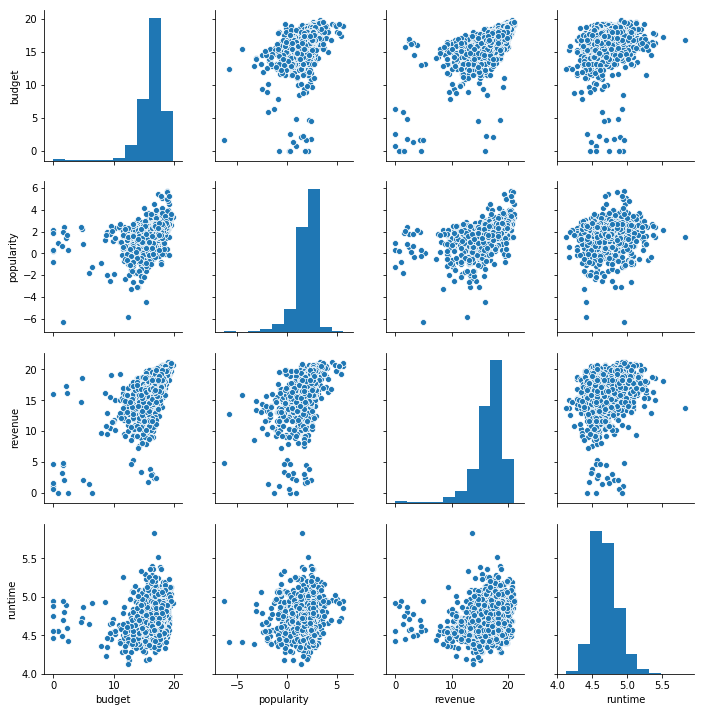

In [84]:
log_df = df[numeric_columns].apply(np.log)
plot = sns.pairplot(log_df)

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


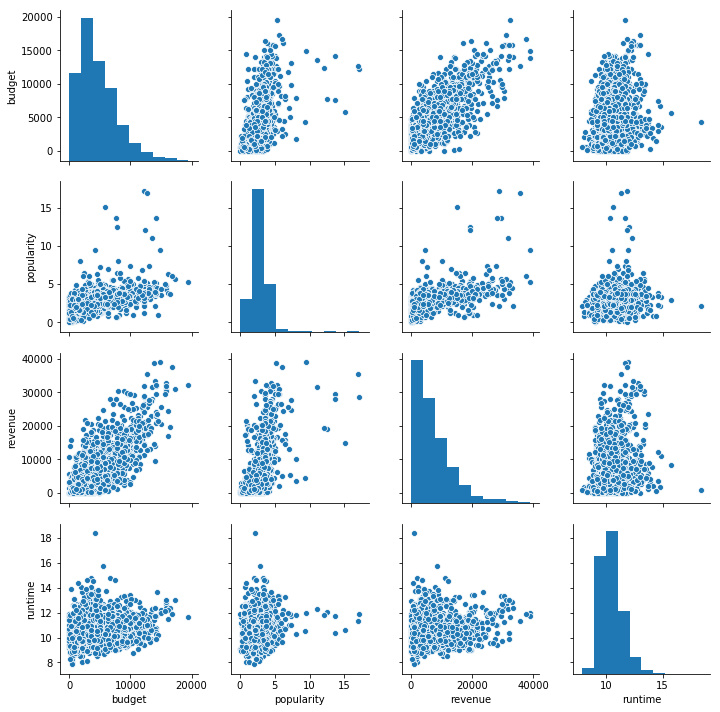

In [85]:
sqrt_df = df[numeric_columns].apply(np.sqrt)
plot = sns.pairplot(sqrt_df)

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


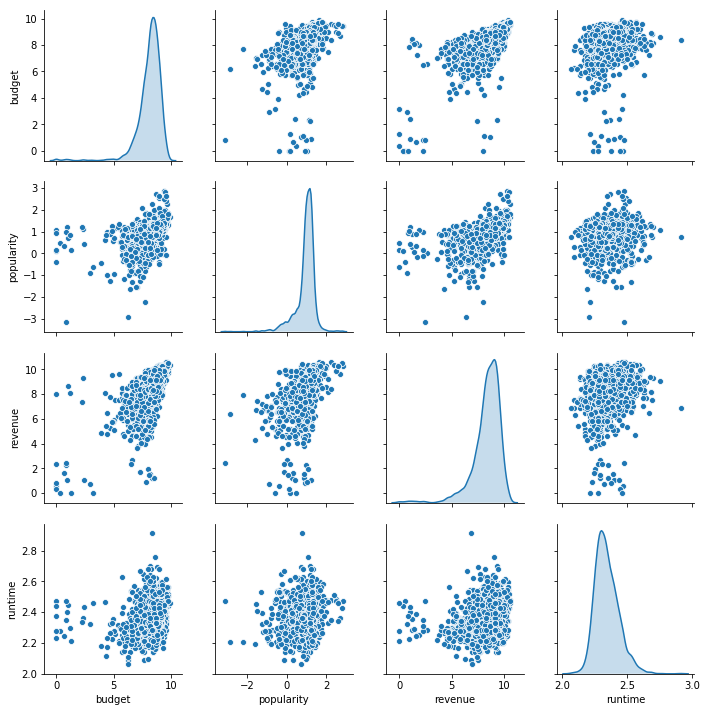

In [90]:
log_sqrt_df = df[numeric_columns].apply(np.sqrt).apply(np.log)
plot = sns.pairplot(log_sqrt_df, diag_kind='kde')

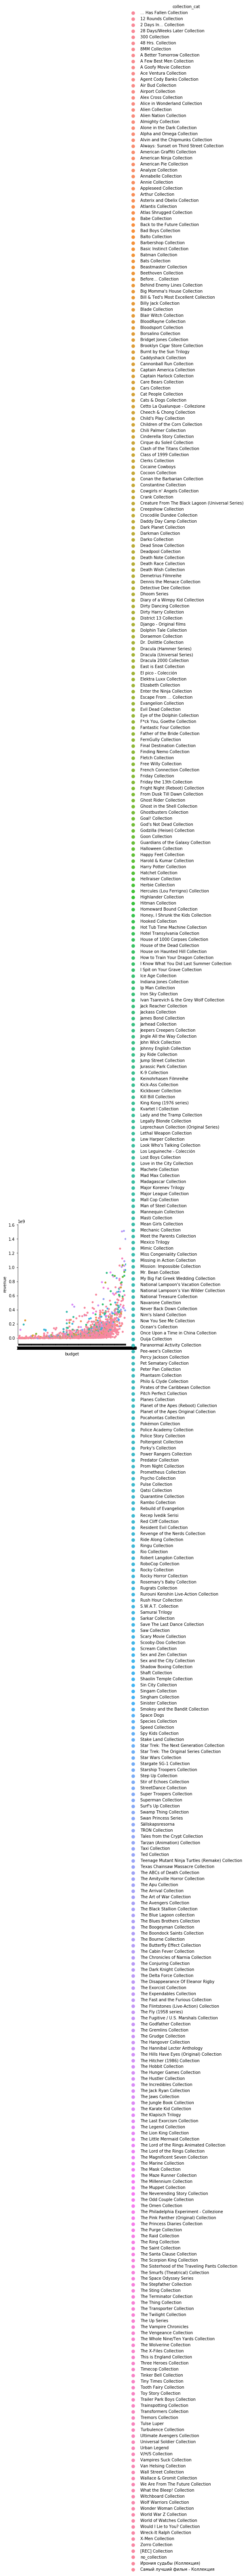

In [42]:
plot = sns.catplot(x='budget', y='revenue', hue='collection_cat', kind='swarm', data=df[(df.budget > 0) & (df.revenue > 0)])